# <b> Лабораторная работа №1.</b>

Вариант 1. Реализация фильтра Собеля.

<b> Задание: </b>

1. Реализовать программу согласно варианту задания. Базовый алгоритм, используемый в программе, необходимо реализовать в 2 вариантах: с использованием встроенных функций какой-либо библиотеки (OpenCV, PIL и др.) и нативно на Python или C++.
2. Сравнить быстродействие реализованных вариантов.
3. Сделать отчёт в виде readme на GitHub, там же должен быть выложен исходный код.

In [28]:
# Стандартные библиотеки
import numpy as np
import time

# Для обработки и отображения изображений
import cv2
from skimage import filters
from PIL import Image
import matplotlib.pyplot as plt

## Scikit-image

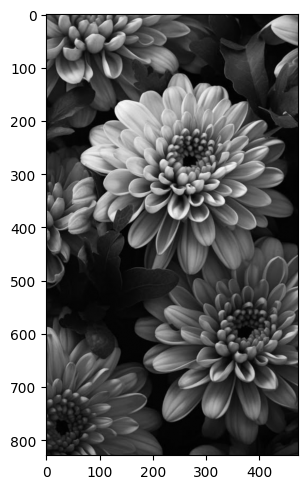

In [29]:
# Загрузка изображения в оттенках серого
img = cv2.imread('flowers.jpg', cv2.IMREAD_GRAYSCALE)

plt.subplots(1, 1, figsize = (6, 5))
plt.imshow(img, cmap = 'gray')
plt.tight_layout()
plt.show()

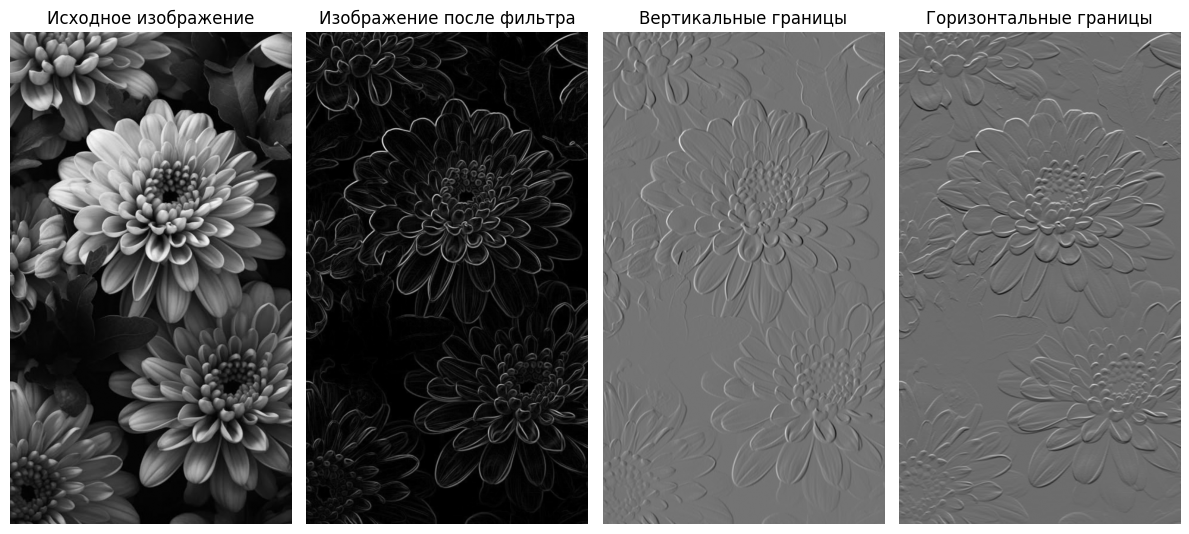

In [ ]:
img_result = filters.sobel(img)     # получение всех границ
v_edges    = filters.sobel_v(img)   # получение вертикальных границ
h_edges    = filters.sobel_h(img)   # получение горизонтальных границ

fig, axes = plt.subplots(1, 4, figsize = (12, 10))
    
axes[0].imshow(img, cmap = 'gray')
axes[0].set_title('Исходное изображение')
axes[0].axis('off')

axes[1].imshow(img_result, cmap = 'gray')
axes[1].set_title('Изображение после фильтра')
axes[1].axis('off')

axes[2].imshow(v_edges, cmap = 'gray')
axes[2].set_title('Вертикальные границы')
axes[2].axis('off')

axes[3].imshow(h_edges, cmap = 'gray')
axes[3].set_title('Горизонтальные границы')
axes[3].axis('off')

plt.tight_layout()
plt.show()

## Нативная реализация

In [31]:
def NativeSobel(image):
    height, width = image.shape
    
    # Ядра Собеля
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]
                        ], 
                        dtype = np.float32
                       )
    
    kernel_y = np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]
                        ], 
                        dtype = np.float32
                       )
    
    # Инициализация выходных изображений
    v_edges = np.zeros((height, width), dtype = np.float32)
    h_edges = np.zeros((height, width), dtype = np.float32)
    
    # Создаем изображение с паддингом (добавляем по 1 пикселю с каждой стороны)
    padded = np.zeros((height + 2, width + 2), dtype = image.dtype)
    # Копируем оригинальное изображение в центр
    padded[1:-1, 1:-1] = image
    
    # Применение свертки
    for i in range(height):
        for j in range(width):
            # Область 3x3 вокруг текущего пикселя в изображении с паддингом
            window = padded[i:i+3, j:j+3].astype(np.float32)
            
            # Свертка с ядрами
            v_edges[i, j] = np.sum(window * kernel_x)
            h_edges[i, j] = np.sum(window * kernel_y)
    
    # Вычисление магнитуды градиента
    sobel_magnitude = np.sqrt(v_edges**2 + h_edges**2)
    
    return sobel_magnitude, v_edges, h_edges

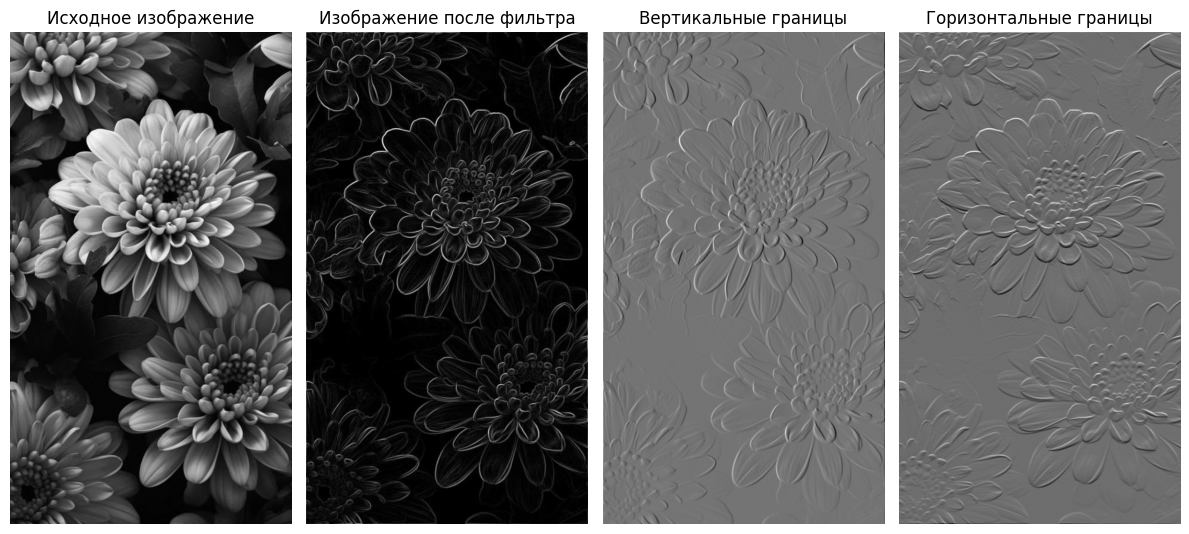

In [32]:
img_result, v_edges, h_edges = NativeSobel(img)

fig, axes = plt.subplots(1, 4, figsize=(12, 10))
    
axes[0].imshow(img, cmap = 'gray')
axes[0].set_title('Исходное изображение')
axes[0].axis('off')

axes[1].imshow(img_result, cmap = 'gray')
axes[1].set_title('Изображение после фильтра')
axes[1].axis('off')

axes[2].imshow(v_edges, cmap = 'gray')
axes[2].set_title('Вертикальные границы')
axes[2].axis('off')

axes[3].imshow(h_edges, cmap = 'gray')
axes[3].set_title('Горизонтальные границы')
axes[3].axis('off')

plt.tight_layout()
plt.show()

## Сравнение реализаций

In [33]:
num_runs = 10

# Тестирование Scikit реализации
scikit_times = []
for _ in range(num_runs):
    start_time = time.time()
    result     = filters.sobel(img)
    end_time   = time.time()
    scikit_times.append(end_time - start_time)

# Тестирование нативной реализации
native_times = []
for _ in range(num_runs):
    start_time   = time.time()
    result, _, _ = NativeSobel(img)
    end_time     = time.time()
    native_times.append(end_time - start_time)


# Вывод результатов
print(f"Scikit реализация:")
print(f"  Среднее время         : {np.mean(scikit_times):.4f} с.")
print(f"  Стандартное отклонение: {np.std(scikit_times):.4f} с.")
print(f"  Минимальное время     : {np.min(scikit_times):.4f} с.")

print(f"\nНативная реализация:")
print(f"  Среднее время         : {np.mean(native_times):.4f} с.")
print(f"  Стандартное отклонение: {np.std(native_times):.4f} с.")
print(f"  Минимальное время     : {np.min(native_times):.4f} с.")

# Сравнение производительности
speedup_naive = np.mean(native_times) / np.mean(scikit_times)
print(f"\nScikit быстрее нативной реализации в {speedup_naive:.1f} раз")

Scikit реализация:
  Среднее время         : 0.0194 с.
  Стандартное отклонение: 0.0013 с.
  Минимальное время     : 0.0170 с.

Нативная реализация:
  Среднее время         : 4.0761 с.
  Стандартное отклонение: 0.1011 с.
  Минимальное время     : 3.9101 с.

Scikit быстрее нативной реализации в 210.1 раз
